In [8]:
import numpy as np
from plane_trusses import analysis  # Importar la función de análisis para cerchas
from analisis_cerchas import *      # Importar funciones adicionales de análisis
import matplotlib.pyplot as plt     # Importar matplotlib para visualización

def calcular_esfuerzos(secciones_transversales):
    """
    Función para calcular los esfuerzos en los elementos de una cercha, dada la sección transversal de cada elemento.
    
    Argumentos:
    - secciones_transversales: Lista o array de secciones transversales para cada elemento en el orden de los elementos.

    Retorno:
    - esfuerzos: Array de esfuerzos en los elementos (Pa).
    - Masas: Array de masas en los elementos (kg).
    """

    # -------------------------------
    # Definición de nodos
    # -------------------------------
    # Definir el ancho total y la altura total de la cercha
    ancho_total = 24.0  # Ancho total de la cercha
    alto_total = 6.0    # Altura total de la cercha
    num_vanos = 6       # Número de vanos (segmentos horizontales)

    # Calcular el ancho de cada vano
    vano = ancho_total / num_vanos

    # Generar los nodos
    nodes = np.array([
        [0.0, 0.0],                 # Nodo 0: Soporte izquierdo
        [vano * 1, 0.0],            # Nodo 1
        [vano * 2, 0.0],            # Nodo 2
        [vano * 3, 0.0],            # Nodo 3
        [vano * 4, 0.0],            # Nodo 4
        [vano * 5, 0.0],            # Nodo 5
        [vano * 6, 0.0],            # Nodo 6: Soporte derecho
        [vano * 1, alto_total],     # Nodo 7: Nodo superior entre 0 y 1
        [vano * 2, alto_total],     # Nodo 8: Nodo superior entre 1 y 2
        [vano * 3, alto_total],     # Nodo 9: Nodo superior entre 2 y 3
        [vano * 4, alto_total],     # Nodo 10: Nodo superior entre 3 y 4
        [vano * 5, alto_total],     # Nodo 11: Nodo superior entre 4 y 5
    ])

    # -------------------------------
    # Definición de restricciones
    # -------------------------------
    cons = np.array([
        [-1, -1],  # Nodo 0: Fijo en x e y (Soporte izquierdo)
        [0, 0],    # Nodo 1: Libre en ambas direcciones
        [0, 0],    # Nodo 2: Libre en ambas direcciones
        [0, 0],    # Nodo 3: Libre en ambas direcciones
        [0, 0],    # Nodo 4: Libre en ambas direcciones
        [0, 0],    # Nodo 5: Libre en ambas direcciones
        [0, -1],   # Nodo 6: Fijo en y, libre en x (Soporte derecho)
        [0, 0],    # Nodo 7: Libre
        [0, 0],    # Nodo 8: Libre
        [0, 0],    # Nodo 9: Libre
        [0, 0],    # Nodo 10: Libre
        [0, 0],    # Nodo 11: Libre
    ], dtype=int)

    # -------------------------------
    # Definición de elementos
    # -------------------------------
    elements = np.array([
        [0, 0, 1],  # Chord inferior entre Nodo 0 y Nodo 1
        [0, 1, 2],  # Chord inferior entre Nodo 1 y Nodo 2
        [0, 2, 3],  # Chord inferior entre Nodo 2 y Nodo 3
        [0, 3, 4],  # Chord inferior entre Nodo 3 y Nodo 4
        [0, 4, 5],  # Chord inferior entre Nodo 4 y Nodo 5
        [0, 5, 6],  # Chord inferior entre Nodo 5 y Nodo 6

        [0, 7, 8],  # Chord superior entre Nodo 7 y Nodo 8
        [0, 8, 9],  # Chord superior entre Nodo 8 y Nodo 9
        [0, 9, 10], # Chord superior entre Nodo 9 y Nodo 10
        [0, 10, 11],# Chord superior entre Nodo 10 y Nodo 11

        # Elementos verticales
        [0, 1, 7],  # Vertical entre Nodo 1 y Nodo 7
        [0, 2, 8],  # Vertical entre Nodo 2 y Nodo 8
        [0, 3, 9],  # Vertical entre Nodo 3 y Nodo 9
        [0, 4, 10], # Vertical entre Nodo 4 y Nodo 10
        [0, 5, 11], # Vertical entre Nodo 5 y Nodo 11

        # Elementos diagonales
        [0, 0, 7],  # Diagonal entre Nodo 0 y Nodo 7
        [0, 7, 2],  # Diagonal entre Nodo 7 y Nodo 2
        [0, 1, 8],  # Diagonal entre Nodo 1 y Nodo 8
        [0, 8, 3],  # Diagonal entre Nodo 8 y Nodo 3
        [0, 2, 9],  # Diagonal entre Nodo 2 y Nodo 9
        [0, 9, 4],  # Diagonal entre Nodo 9 y Nodo 4
        [0, 3, 10], # Diagonal entre Nodo 3 y Nodo 10
        [0, 10, 5], # Diagonal entre Nodo 10 y Nodo 5
        [0, 4, 11], # Diagonal entre Nodo 4 y Nodo 11
        [0, 11, 6], # Diagonal entre Nodo 11 y Nodo 6
    ])

    # -------------------------------
    # Definición de cargas
    # -------------------------------
    loads = np.array([
        [0.0, 0.0],    # Nodo 0: Sin carga (soporte)
        [0.0, -2000/5],# Nodo 1: Carga de -2 kN en y
        [0.0, -2000/5],# Nodo 2: Carga de -2 kN en y
        [0.0, -2000/5],# Nodo 3: Carga de -2 kN en y
        [0.0, -2000/5],# Nodo 4: Carga de -2 kN en y
        [0.0, -2000/5],# Nodo 5: Carga de -2 kN en y
        [0.0, 0.0],    # Nodo 6: Sin carga (soporte)
        [0.0, 0.0],    # Nodo 7: Sin carga
        [0.0, 0.0],    # Nodo 8: Sin carga
        [0.0, 0.0],    # Nodo 9: Sin carga
        [0.0, 0.0],    # Nodo 10: Sin carga
        [0.0, 0.0],    # Nodo 11: Sin carga
    ])

    # -------------------------------
    # Definición de materiales
    # -------------------------------
    # Modificar el área de cada elemento usando las secciones transversales proporcionadas
    mats = np.array([[200e9, area] for area in secciones_transversales])

    # -------------------------------
    # Preparación de datos para el análisis
    # -------------------------------
    data = {
        "nodes": nodes,
        "cons": cons,
        "elements": elements,
        "loads": loads,
        "mats": mats
    }

    # -------------------------------
    # Análisis estructural
    # -------------------------------
    # Realizar el análisis para obtener los desplazamientos de los nodos
    disp = analysis(data, verbose=False)

    # Calcular las fuerzas internas en los elementos
    esfuerzos = calc_esfuerzos_int(nodes, elements, mats, disp)
    vis_esfuerzos(nodes, elements, esfuerzos, desp=None)
    
    
    return esfuerzos

Esfuerzos en los elementos (MPa): [ 0.33  0.39  0.55  0.55  0.39  0.33 -0.48 -0.58 -0.58 -0.48  0.28  0.01
  0.06  0.01  0.28 -0.6   0.27 -0.09  0.08 -0.04 -0.04  0.08 -0.09  0.27
 -0.6 ]
El esfuerzo máximo alcanzado es de 0.55 MPa


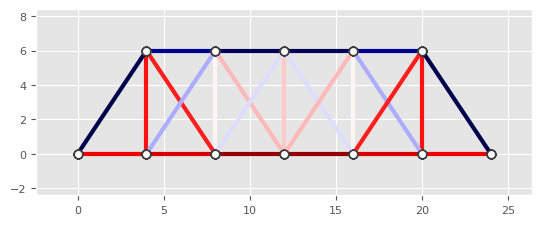

In [6]:
# -------------------------------
# Definición de cargas
# -------------------------------
cargas = np.array([
    [0.0, 0.0],    # Nodo 0: Sin carga (soporte)
    [0.0, -2000/5],# Nodo 1: Carga de -2 kN en y
    [0.0, -2000/5],# Nodo 2: Carga de -2 kN en y
    [0.0, -2000/5],# Nodo 3: Carga de -2 kN en y
    [0.0, -2000/5],# Nodo 4: Carga de -2 kN en y
    [0.0, -2000/5],# Nodo 5: Carga de -2 kN en y
    [0.0, 0.0],    # Nodo 6: Sin carga (soporte)
    [0.0, 0.0],    # Nodo 7: Sin carga
    [0.0, 0.0],    # Nodo 8: Sin carga
    [0.0, 0.0],    # Nodo 9: Sin carga
    [0.0, 0.0],    # Nodo 10: Sin carga
    [0.0, 0.0],    # Nodo 11: Sin carga
])

secciones = [0.002 for _ in range(24)]  # secciones de 0.002 m² para todos los elementos
esfuerzos = calcular_esfuerzos(secciones,cargas)

# Imprimir resultados
print("Esfuerzos en los elementos (MPa):", np.round(esfuerzos/ 1e6,2))
print("El esfuerzo máximo alcanzado es de", round(max(esfuerzos) / 1e6, 2), "MPa")